In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [16]:
df2 = pd.read_csv("Mera_CleanData.csv")
print("Dataset Description")
print(df2.info())

Dataset Description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         16441 non-null  object 
 1   max_temp                     16441 non-null  float64
 2   min_temp                     16441 non-null  float64
 3   igmin                        16441 non-null  int64  
 4   min_grass                    16436 non-null  float64
 5   rain                         16441 non-null  float64
 6   pressure_cbl                 16441 non-null  float64
 7   wind_speed                   16441 non-null  float64
 8   max_10minute_wind            16441 non-null  float64
 9   dir_10minute_wind            16441 non-null  float64
 10  max_gust                     16441 non-null  float64
 11  sun                          16441 non-null  float64
 12  dos                          16437 non-null  float64
 

In [17]:
# Convert the column to numeric
df2['global_rad_num'] = pd.to_numeric(df2['global_radiation'], errors='coerce')
# Select all numeric columns
df2_num = df2.select_dtypes(include=['number'])

# Display the numeric columns
print(df2_num.head())

# Get the list of numeric column names
numeric_column_names = df2_num.columns.tolist()
print("Numeric columns:", numeric_column_names)

   max_temp  min_temp  igmin  min_grass  rain  pressure_cbl  wind_speed  \
0     -0.27     -0.36      1      -1.18   0.9         997.9       -0.31   
1     -0.48     -0.48      0      -0.29   0.7         998.8       -0.45   
2      0.48      0.60      0       0.62   4.8         990.8        0.92   
3     -0.15      0.22      0       0.21   0.5         990.0        0.74   
4     -0.40     -0.14      0      -0.04   0.0        1001.6        0.51   

   max_10minute_wind  dir_10minute_wind  max_gust  ...  year  month  day  \
0              -0.26               0.89     -0.40  ...  1979     10   28   
1              -0.88               0.42     -0.91  ...  1979     10   29   
2               0.96               0.07      1.05  ...  1979     10   30   
3               0.96               0.54      1.15  ...  1979     10   31   
4               0.20               0.42      0.12  ...  1979     11    1   

   temp_range  smd_combined  extreme_rain  heatwave  high_wind  \
0         7.5         -0.1

In [32]:
X = df2_num.copy().dropna(axis=1)
y = df2_num['extreme_rain']

In [33]:
# Inspect correlations
correlations = X.corrwith(y).sort_values(ascending=False)
print("Top Feature Correlations with Target:\n", correlations.head(10))

# Check for duplicates
duplicates = df2_num.duplicated().sum()
print(f"Total Duplicates in Dataset: {duplicates}")

# Check for overlap between splits
train_indices = set(X_train.index)
val_indices = set(X_val.index)
test_indices = set(X_test.index)

print(f"Train-Val Overlap: {len(train_indices.intersection(val_indices))}")
print(f"Train-Test Overlap: {len(train_indices.intersection(test_indices))}")
print(f"Val-Test Overlap: {len(val_indices.intersection(test_indices))}")


Top Feature Correlations with Target:
 extreme_rain         1.000000
extreme_weather      0.993179
rain                 0.915419
max_gust             0.307291
max_10minute_wind    0.290492
wind_speed           0.207405
min_temp             0.055401
month                0.022287
heatwave             0.011340
high_wind            0.011283
dtype: float64
Total Duplicates in Dataset: 0
Train-Val Overlap: 0
Train-Test Overlap: 0
Val-Test Overlap: 0


In [34]:
# Drop the highly correlated feature 'rain'
X = X.drop(columns=["extreme_rain"], errors="ignore")

# Re-split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Handle class imbalance with SMOTE (optional)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on validation set
y_val_pred = clf.predict(X_val)
print("\nValidation Set Evaluation:")
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('Classification Report:\n', classification_report(y_val, y_val_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = clf.predict(X_test)
print("\nTest Set Evaluation:")
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Validation Set Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00       672

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Confusion Matrix:
 [[1794    0]
 [   0  672]]

Test Set Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1828
           1       1.00      1.00      1.00       639

    accuracy                           1.00      2467
   macro avg       1.00      1.00      1.00      2467
weighted avg       1.00      1.00      1.00      2467

Confusion Matrix:
 [[1828    0]
 [   0  639]]


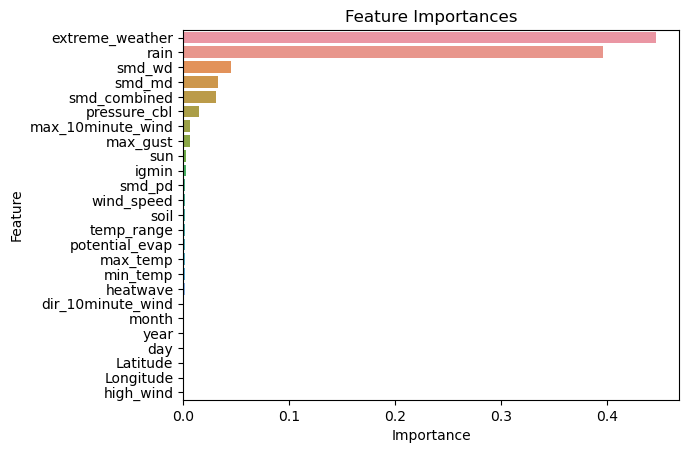

<Figure size 640x480 with 0 Axes>

In [21]:
# Get feature importances from the trained Random Forest model
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Visualize feature importances
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances")
plt.show()
# Save the plot as an image file
plt.savefig('Feature_Importances.png')

In [23]:
X_clustering = X.copy() 

In [24]:
# Map feature importances to X_clustering based on feature names
X_clustering_importance = X_clustering.copy()  # Make a copy to avoid overwriting original data

# Assuming each feature's importance will be the same across all rows in X_clustering
for feature, importance in zip(feature_names, importances):
    X_clustering_importance[feature + '_importance'] = importance

# Display the updated DataFrame with feature importances
print(X_clustering_importance.columns)

Index(['max_temp', 'min_temp', 'igmin', 'rain', 'pressure_cbl', 'wind_speed',
       'max_10minute_wind', 'dir_10minute_wind', 'max_gust', 'sun', 'soil',
       'potential_evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'year', 'month', 'day', 'temp_range', 'smd_combined', 'heatwave',
       'high_wind', 'extreme_weather', 'max_temp_importance',
       'min_temp_importance', 'igmin_importance', 'rain_importance',
       'pressure_cbl_importance', 'wind_speed_importance',
       'max_10minute_wind_importance', 'dir_10minute_wind_importance',
       'max_gust_importance', 'sun_importance', 'soil_importance',
       'potential_evap_importance', 'smd_wd_importance', 'smd_md_importance',
       'smd_pd_importance', 'Latitude_importance', 'Longitude_importance',
       'year_importance', 'month_importance', 'day_importance',
       'temp_range_importance', 'smd_combined_importance',
       'heatwave_importance', 'high_wind_importance',
       'extreme_weather_importance'

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END max_depth=10, min_sa

In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation on training set
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [27]:
#Compare Models 
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Logistic Regression
y_log_pred = log_model.predict(X_val)
print("\nLogistic Regression Validation Accuracy:", accuracy_score(y_val, y_log_pred))



Logistic Regression Validation Accuracy: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC Score: 1.00


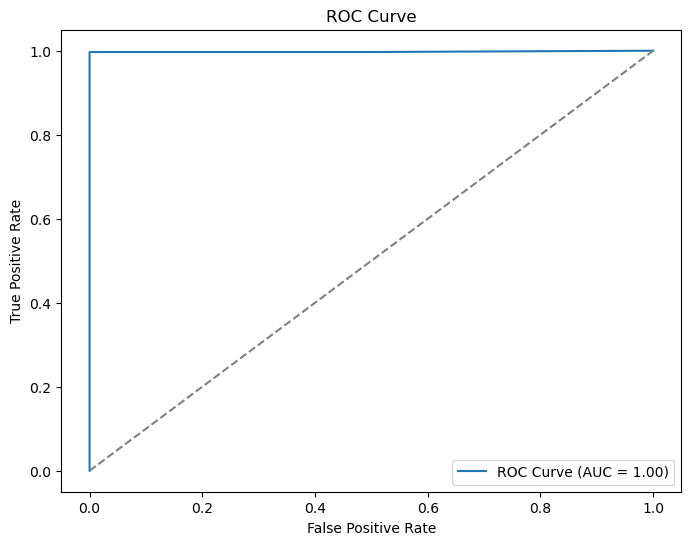

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC-AUC for test set
y_test_probs = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_probs)
fpr, tpr, threshold = roc_curve(y_test, y_test_probs)

# Create a DataFrame to store ROC data
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': threshold 
})

# Save the data to a CSV file
roc_data.to_csv('roc_data1.csv', index=False)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


K-Means Clustering

In [44]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable
X_clustering = X.copy()  # Assuming X is already prepared for modeling

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

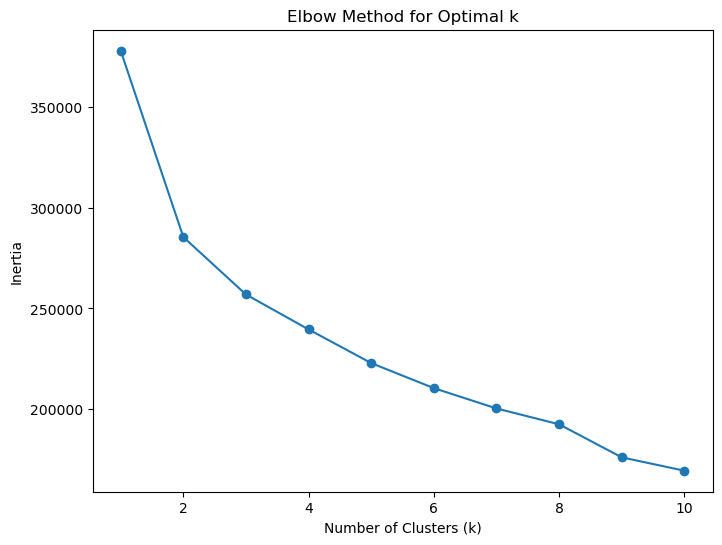

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

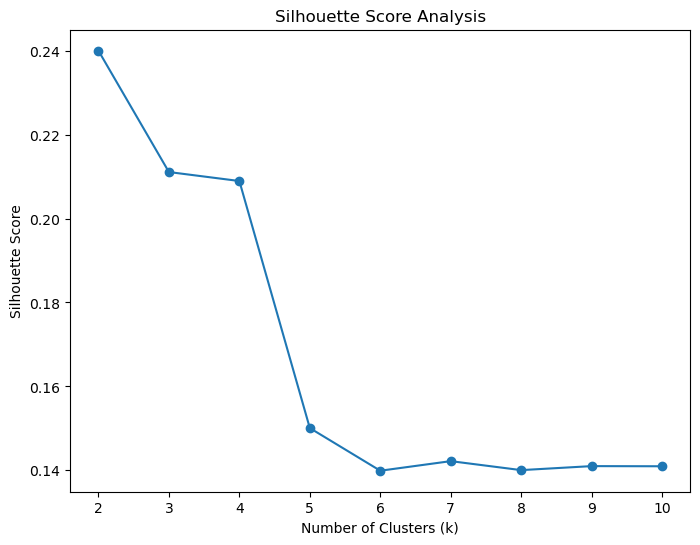

In [46]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different k
silhouette_scores = []
for k in range(2, 11):  # Silhouette is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [47]:
# Choose optimal k (replace with your choice based on the above analysis)
optimal_k = 3

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
X_clustering['Cluster'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


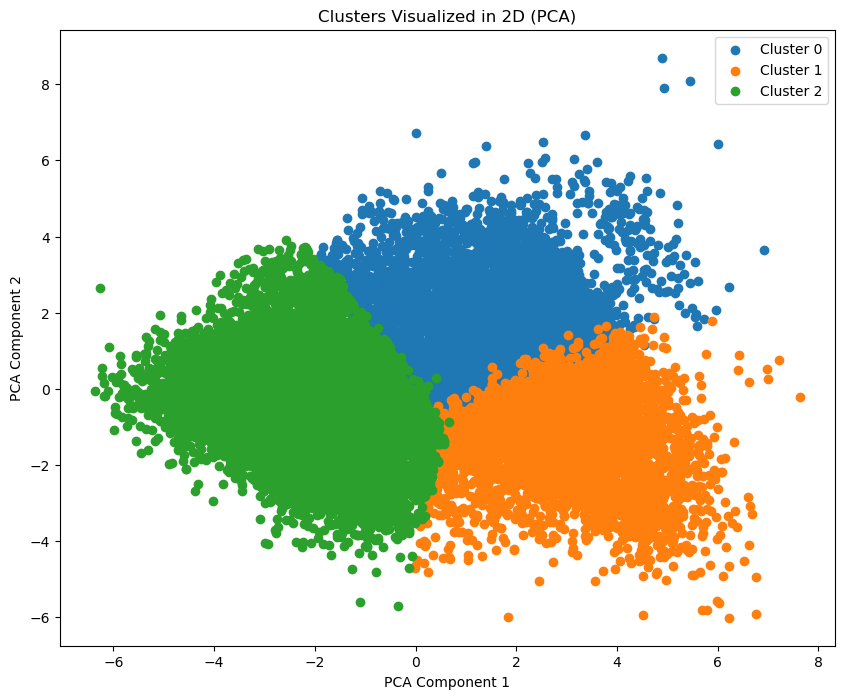

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is your scaled feature set

# Add PCA components to the original DataFrame
X_clustering['PCA_1'] = X_pca[:, 0]
X_clustering['PCA_2'] = X_pca[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):  # optimal_k is the number of clusters
    plt.scatter(
        X_clustering.loc[kmeans.labels_ == cluster, 'PCA_1'],  # Select rows matching the cluster
        X_clustering.loc[kmeans.labels_ == cluster, 'PCA_2'],
        label=f'Cluster {cluster}'
    )

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized in 2D (PCA)')
plt.legend()
plt.show()


In [49]:
# Combine cluster labels with the original target
X_clustering['extreme_rain'] = y.values
cluster_target_summary = X_clustering.groupby('Cluster')['extreme_rain'].mean()

print("Cluster vs Extreme Rain Probability:")
print(cluster_target_summary)


Cluster vs Extreme Rain Probability:
Cluster
0    0.040062
1    0.676210
2    0.175228
Name: extreme_rain, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


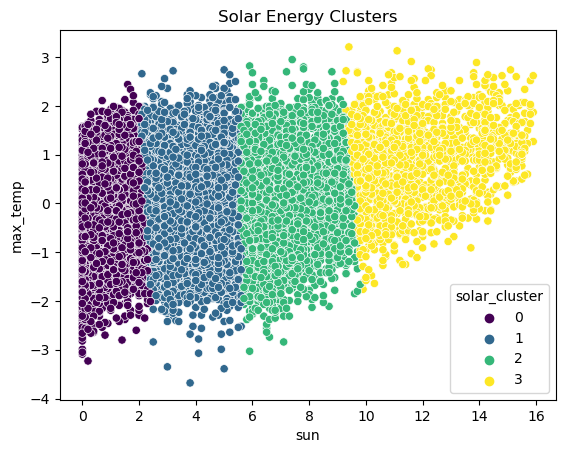

In [38]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
X_clustering['solar_cluster'] = kmeans.fit_predict(X_clustering[['sun', 'heatwave', 'max_temp']])

# Visualize the clusters
sns.scatterplot(data=X_clustering, x='sun', y='max_temp', hue='solar_cluster', palette='viridis')
plt.title('Solar Energy Clusters')
plt.show()


In [37]:
X_clustering.columns

Index(['max_temp', 'min_temp', 'igmin', 'rain', 'pressure_cbl', 'wind_speed',
       'max_10minute_wind', 'dir_10minute_wind', 'max_gust', 'sun', 'soil',
       'potential_evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'year', 'month', 'day', 'temp_range', 'smd_combined', 'heatwave',
       'high_wind', 'extreme_weather', 'extreme_gust'],
      dtype='object')

In [54]:
# Define the threshold for extreme gusts (e.g., 50 km/h)
threshold = -0.40  # Adjust based on your dataset or research

# Create a new binary column 'Extreme_Gust' where 1 = extreme gust, 0 = normal gust
X_clustering['extreme_gust'] = (X_clustering['max_gust'] > threshold).astype(int)

# Check the new column
print(X_clustering[['max_gust', 'extreme_gust']].head())

   max_gust  extreme_gust
0     -0.40             0
1     -0.91             0
2      1.05             1
3      1.15             1
4      0.12             1


In [55]:
X_clustering.columns

Index(['max_temp', 'min_temp', 'igmin', 'rain', 'pressure_cbl', 'wind_speed',
       'max_10minute_wind', 'dir_10minute_wind', 'max_gust', 'sun', 'soil',
       'potential_evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'year', 'month', 'day', 'temp_range', 'smd_combined', 'heatwave',
       'high_wind', 'extreme_weather', 'Cluster', 'PCA_1', 'PCA_2',
       'extreme_rain', 'extreme_gust'],
      dtype='object')

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1990
           1       0.91      0.89      0.90      2943

    accuracy                           0.88      4933
   macro avg       0.87      0.88      0.88      4933
weighted avg       0.88      0.88      0.88      4933



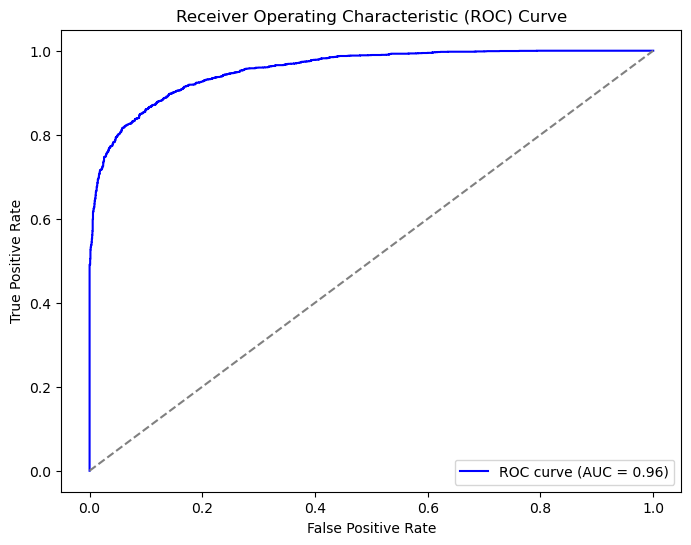

   max_temp  min_temp  igmin  rain  pressure_cbl  wind_speed  \
0     -0.27     -0.36      1   0.9         997.9       -0.31   
1     -0.48     -0.48      0   0.7         998.8       -0.45   
2      0.48      0.60      0   4.8         990.8        0.92   
3     -0.15      0.22      0   0.5         990.0        0.74   
4     -0.40     -0.14      0   0.0        1001.6        0.51   

   max_10minute_wind  dir_10minute_wind  max_gust  sun  ...  extreme_weather  \
0              -0.26               0.89     -0.40  4.2  ...                0   
1              -0.88               0.42     -0.91  0.4  ...                0   
2               0.96               0.07      1.05  0.6  ...                1   
3               0.96               0.54      1.15  6.7  ...                0   
4               0.20               0.42      0.12  7.0  ...                0   

   Cluster     PCA_1     PCA_2  extreme_rain  extreme_gust  precision  \
0        0  1.586350  1.268112             0             0   

In [56]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for logistic regression
X = X_clustering[['wind_speed', 'pressure_cbl']]  # Features
y = X_clustering['extreme_gust'] # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of extreme gust (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision, Recall, TPR, and FPR
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# TPR is the same as Recall
TPR = recall
# FPR is calculated as (1 - Specificity), and Specificity = TN / (TN + FP)
FPR = 1 - (y_pred == 0).sum() / (y_pred == 0).sum() + (y_pred == 1).sum()  # Alternative computation

# Add metrics to X_clustering
X_clustering['precision'] = precision
X_clustering['recall'] = recall
X_clustering['TPR'] = TPR
X_clustering['FPR'] = FPR

# Display the updated DataFrame
print(X_clustering.head())


In [57]:
df2.columns

Index(['date', 'max_temp', 'min_temp', 'igmin', 'min_grass', 'rain',
       'pressure_cbl', 'wind_speed', 'max_10minute_wind', 'dir_10minute_wind',
       'max_gust', 'sun', 'dos', 'global_radiation', 'soil', 'potential_evap',
       'evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'Station Name', 'year', 'month', 'day', 'temp_range', 'smd_combined',
       'wind_category', 'extreme_rain', 'heatwave', 'high_wind',
       'extreme_weather', 'extreme_weather_combination', 'sun_category',
       'season', 'global_rad_num'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/3385004514.py:46: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_2_years = df.last('730D')
/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/3385004514.py:61: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  forecast_std = np.std(df['max_temp'].last('365D'))


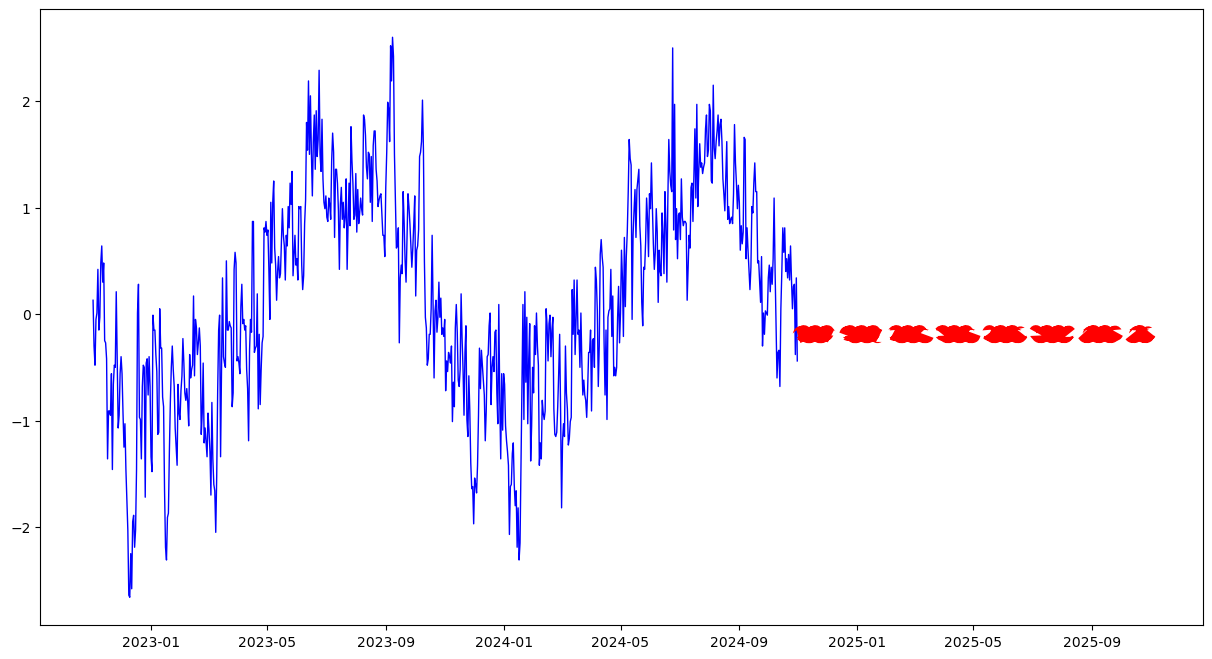

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation
df = pd.DataFrame({
    'date': pd.to_datetime(df2['date']),
    'max_temp': df2['max_temp']
})

# Handle missing values
df['max_temp'] = df['max_temp'].fillna(df['max_temp'].mean())

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Sort index to ensure time series is in chronological order
df = df.sort_index()

# Apply Exponential Smoothing
model = ExponentialSmoothing(
    df['max_temp'],
    trend='add',
    seasonal='add',
    seasonal_periods=12,
    initialization_method='estimated'
)
model_fit = model.fit()

# Increase forecast period to 365 days (1 year) for better visibility
forecast = model_fit.forecast(steps=365)

# Create a date range for the forecast
forecast_index = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=365,
    freq='D'
)
forecast_series = pd.Series(forecast, index=forecast_index)

# Create the plot with improved styling
plt.figure(figsize=(15, 8))

# Plot historical data for the last 2 years only (for better visibility)
last_2_years = df.last('730D')
plt.plot(last_2_years.index, last_2_years['max_temp'], 
         label='Historical Data (Last 2 Years)', 
         color='blue',
         linewidth=1)

# Plot forecast
plt.plot(forecast_series.index, forecast_series, 
         label='1-Year Forecast', 
         color='red',
         linestyle='--',
         linewidth=10)

# Add confidence intervals (if available)
forecast_mean = forecast_series.values
forecast_std = np.std(df['max_temp'].last('365D'))
plt.fill_between(forecast_series.index,
                forecast_mean - 1.96 * forecast_std,
                forecast_mean + 1.96 * forecast_std,
                color='red',
                alpha=0)

In [59]:
df2.columns

Index(['date', 'max_temp', 'min_temp', 'igmin', 'min_grass', 'rain',
       'pressure_cbl', 'wind_speed', 'max_10minute_wind', 'dir_10minute_wind',
       'max_gust', 'sun', 'dos', 'global_radiation', 'soil', 'potential_evap',
       'evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'Station Name', 'year', 'month', 'day', 'temp_range', 'smd_combined',
       'wind_category', 'extreme_rain', 'heatwave', 'high_wind',
       'extreme_weather', 'extreme_weather_combination', 'sun_category',
       'season', 'global_rad_num'],
      dtype='object')

In [60]:
df2_num.columns

Index(['max_temp', 'min_temp', 'igmin', 'min_grass', 'rain', 'pressure_cbl',
       'wind_speed', 'max_10minute_wind', 'dir_10minute_wind', 'max_gust',
       'sun', 'dos', 'soil', 'potential_evap', 'evap', 'smd_wd', 'smd_md',
       'smd_pd', 'Latitude', 'Longitude', 'year', 'month', 'day', 'temp_range',
       'smd_combined', 'extreme_rain', 'heatwave', 'high_wind',
       'extreme_weather', 'global_rad_num'],
      dtype='object')

In [61]:
X_clustering.columns

Index(['max_temp', 'min_temp', 'igmin', 'rain', 'pressure_cbl', 'wind_speed',
       'max_10minute_wind', 'dir_10minute_wind', 'max_gust', 'sun', 'soil',
       'potential_evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude', 'Longitude',
       'year', 'month', 'day', 'temp_range', 'smd_combined', 'heatwave',
       'high_wind', 'extreme_weather', 'Cluster', 'PCA_1', 'PCA_2',
       'extreme_rain', 'extreme_gust', 'precision', 'recall', 'TPR', 'FPR'],
      dtype='object')

In [63]:
X_clustering['date'] = df2.date
X_clustering['date'] = pd.to_datetime(X_clustering['date'])

In [64]:
# First, ensure the forecast series has a proper name
forecast_series.name = 'temperature_forecast'

# Create a DataFrame from the forecast series
forecast_df = forecast_series.to_frame()

# Reset index to make the date a column
forecast_df = forecast_df.reset_index()
forecast_df.columns = ['date', 'temperature_forecast']

# If X_clustering has an index, reset it
X_clustering = X_clustering.reset_index() if isinstance(X_clustering.index, pd.DatetimeIndex) else X_clustering

# Merge the datasets on the date column
merged_df = pd.merge(X_clustering, forecast_df, on='date', how='outer')

# Fill NaN values with appropriate method (you can modify this based on your needs)
merged_df = merged_df.fillna(method='ffill')  # Forward fill
merged_df = merged_df.fillna(method='bfill')  # Backward fill for any remaining NaNs

# Ensure date is in the correct format for Tableau
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort by date
merged_df = merged_df.sort_values('date')

# Print info about the merged dataset
print("\nMerged Dataset Info:")
print(f"Number of rows: {len(merged_df)}")
print(f"Date range: {merged_df['date'].min()} to {merged_df['date'].max()}")
print("\nColumns in merged dataset:")
for col in merged_df.columns:
    print(f"- {col}")


Merged Dataset Info:
Number of rows: 16806
Date range: 1979-10-28 00:00:00 to 2025-10-31 00:00:00

Columns in merged dataset:
- max_temp
- min_temp
- igmin
- rain
- pressure_cbl
- wind_speed
- max_10minute_wind
- dir_10minute_wind
- max_gust
- sun
- soil
- potential_evap
- smd_wd
- smd_md
- smd_pd
- Latitude
- Longitude
- year
- month
- day
- temp_range
- smd_combined
- heatwave
- high_wind
- extreme_weather
- Cluster
- PCA_1
- PCA_2
- extreme_rain
- extreme_gust
- precision
- recall
- TPR
- FPR
- date
- temperature_forecast


/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/2299980463.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')  # Forward fill
/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/2299980463.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='bfill')  # Backward fill for any remaining NaNs


In [73]:
import pandas as pd

# Ensure all dates are in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Merge dataframes on the 'date' column with an outer join
final_df = pd.merge(df2, merged_df, on='date', how='outer')

# Resolve overlapping columns created during the merge
for col in final_df.columns:
    if col.endswith('_x') or col.endswith('_y'):
        base_col = col[:-2]  # Get the base column name (without _x or _y)
        if base_col in final_df.columns:
            # Combine data from both versions (_x and _y) into the base column
            final_df[base_col] = final_df[base_col].combine_first(final_df[col])
            # Drop the duplicate column
            final_df.drop(columns=[col], inplace=True)
        else:
            # Rename the column to its base name if it doesn't already exist
            final_df.rename(columns={col: base_col}, inplace=True)

# Fill missing values if any remain
final_df = final_df.fillna(method='ffill').fillna(method='bfill')

# Save the final dataset to CSV for Tableau
#final_df.to_csv('final_dataset_for_tableau.csv', index=False)

# Print information about the final dataset
print("\nFinal Dataset Info:")
print(f"Number of rows: {len(final_df)}")
print(f"Number of columns: {len(final_df.columns)}")
print(f"Date range: {final_df['date'].min()} to {final_df['date'].max()}")
print("\nColumns in final dataset:")
for col in final_df.columns:
    print(f"- {col}")

# Display first few rows to verify the merge
print("\nFirst few rows of final dataset:")
print(final_df.head())

# Display basic statistics
print("\nBasic statistics of numeric columns:")
print(final_df.describe())



Final Dataset Info:
Number of rows: 16806
Number of columns: 46
Date range: 1979-10-28 00:00:00 to 2025-10-31 00:00:00

Columns in final dataset:
- date
- max_temp
- min_temp
- igmin
- min_grass
- rain
- pressure_cbl
- wind_speed
- max_10minute_wind
- dir_10minute_wind
- max_gust
- sun
- dos
- global_radiation
- soil
- potential_evap
- evap
- smd_wd
- smd_md
- smd_pd
- Latitude
- Longitude
- Station Name
- year
- month
- day
- temp_range
- smd_combined
- wind_category
- extreme_rain
- heatwave
- high_wind
- extreme_weather
- extreme_weather_combination
- sun_category
- season
- global_rad_num
- Cluster
- PCA_1
- PCA_2
- extreme_gust
- precision
- recall
- TPR
- FPR
- temperature_forecast

First few rows of final dataset:
        date  max_temp  min_temp  igmin  min_grass  rain  pressure_cbl  \
0 1979-10-28     -0.27     -0.36    1.0      -1.18   0.9         997.9   
1 1979-10-29     -0.48     -0.48    0.0      -0.29   0.7         998.8   
2 1979-10-30      0.48      0.60    0.0       

/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/2662362379.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df = final_df.fillna(method='ffill').fillna(method='bfill')


In [75]:
# First ensure dates are in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Create a copy of df2 to avoid modifying the original
final_df = df2.copy()

# Merge with predictions dataframe
final_df = pd.merge(final_df, merged_df, on='date', how='outer')

# Function to combine duplicate columns
def combine_duplicate_columns(df):
    # Get list of columns without date
    cols = df.columns.tolist()
    cols.remove('date')
    
    # Dictionary to store unique column names and their duplicates
    col_dict = {}
    
    # Group duplicate columns
    for col in cols:
        base_name = col.split('_x')[0].split('_y')[0]  # Remove _x or _y suffixes
        if base_name not in col_dict:
            col_dict[base_name] = []
        col_dict[base_name].append(col)
    
    # Create new dataframe with only date column
    new_df = df[['date']].copy()
    
    # Combine duplicate columns
    for base_name, columns in col_dict.items():
        if len(columns) > 1:
            # Combine columns, taking first non-null value
            new_df[base_name] = df[columns].bfill(axis=1).iloc[:, 0]
        else:
            # If no duplicates, just copy the column
            new_df[base_name] = df[columns[0]]
    
    return new_df

# Apply the function to consolidate columns
final_df = combine_duplicate_columns(final_df)

# Sort by date
final_df = final_df.sort_values('date')

# Fill any remaining NaN values
final_df = final_df.fillna(method='ffill')
final_df = final_df.fillna(method='bfill')

# Save the final dataset to CSV for Tableau
final_df.to_csv('final_dataset.csv', index=False)

# Print information about the final dataset
print("\nFinal Consolidated Dataset Info:")
print(f"Number of rows: {len(final_df)}")
print(f"Number of columns: {len(final_df.columns)}")
print(f"Date range: {final_df['date'].min()} to {final_df['date'].max()}")
print("\nColumns in final dataset:")
for col in final_df.columns:
    print(f"- {col}")

# Display first few rows
print("\nFirst few rows of final dataset:")
print(final_df.head())

/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/1832480724.py:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df = final_df.fillna(method='ffill')
/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_79479/1832480724.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df = final_df.fillna(method='bfill')



Final Consolidated Dataset Info:
Number of rows: 16806
Number of columns: 46
Date range: 1979-10-28 00:00:00 to 2025-10-31 00:00:00

Columns in final dataset:
- date
- max_temp
- min_temp
- igmin
- min_grass
- rain
- pressure_cbl
- wind_speed
- max_10minute_wind
- dir_10minute_wind
- max_gust
- sun
- dos
- global_radiation
- soil
- potential_evap
- evap
- smd_wd
- smd_md
- smd_pd
- Latitude
- Longitude
- Station Name
- year
- month
- day
- temp_range
- smd_combined
- wind_category
- extreme_rain
- heatwave
- high_wind
- extreme_weather
- extreme_weather_combination
- sun_category
- season
- global_rad_num
- Cluster
- PCA_1
- PCA_2
- extreme_gust
- precision
- recall
- TPR
- FPR
- temperature_forecast

First few rows of final dataset:
        date  max_temp  min_temp  igmin  min_grass  rain  pressure_cbl  \
0 1979-10-28     -0.27     -0.36    1.0      -1.18   0.9         997.9   
1 1979-10-29     -0.48     -0.48    0.0      -0.29   0.7         998.8   
2 1979-10-30      0.48      0.60 

In [ ]:
# Save the clusters and predictions into CSV
#merged_df.to_csv('predictive_analysis_mera.csv', index=False)

In [67]:
# Load the datasets
roc_data1 = pd.read_csv("roc_data1.csv")  # Replace with the actual path

# Preview the datasets
#print(roc_data.head())
#print(df_temp.head())

In [69]:
merged_data = pd.concat([roc_data1.reset_index(drop=True), 
                         final_df.reset_index(drop=True)], axis=1)

# Columns to update
columns_to_update = ['False Positive Rate', 'True Positive Rate', 'Threshold']

# Replace 0s with the column mean for each specified column
for col in columns_to_update:
    col_mean = roc_data1[col][roc_data1[col] != 0].mean()  # Exclude zeros when calculating mean
    roc_data1[col] = roc_data1[col].replace(0, col_mean)

# Preview the updated dataset
print(roc_data1.head())

# Check for duplicates and drop them
merged_data.drop_duplicates(inplace=True)
print(merged_data.tail())

   False Positive Rate  True Positive Rate  Threshold
0             0.189357            0.953802   2.000000
1             0.189357            0.663537   1.000000
2             0.189357            0.669797   0.999636
3             0.189357            0.672926   0.999500
4             0.189357            0.674491   0.999375
       False Positive Rate  True Positive Rate  Threshold       date  \
16801                  NaN                 NaN        NaN 2025-10-27   
16802                  NaN                 NaN        NaN 2025-10-28   
16803                  NaN                 NaN        NaN 2025-10-29   
16804                  NaN                 NaN        NaN 2025-10-30   
16805                  NaN                 NaN        NaN 2025-10-31   

       max_temp_x  min_temp_x  igmin_x  min_grass  rain_x  pressure_cbl_x  \
16801       -0.44        0.83      0.0       1.04     0.0          1015.8   
16802       -0.44        0.83      0.0       1.04     0.0          1015.8   
16803       

In [ ]:
# Save the final dataset
#merged_data.to_csv("Mera_final1.csv", index=False)

In [ ]:
#X_clustering_importance.to_csv("Mera_metric.csv", index =False)

In [ ]:
#X_clustering_centroid = pd.concat([centroid_df.reset_index(drop=True), 
                         X_clustering_importance.reset_index(drop=True)], axis=1)

In [79]:
import pandas as pd

# Load the CSV file
file_path = 'final_dataset.csv'  # Adjust the path as needed
try:
    data = pd.read_csv(file_path)
    print("CSV File loaded successfully!")
    print(data.head())  # Display the first few rows of the data
except Exception as e:
    print(f"Error loading CSV file: {e}")


CSV File loaded successfully!
         date  max_temp  min_temp  igmin  min_grass  rain  pressure_cbl  \
0  1979-10-28     -0.27     -0.36    1.0      -1.18   0.9         997.9   
1  1979-10-29     -0.48     -0.48    0.0      -0.29   0.7         998.8   
2  1979-10-30      0.48      0.60    0.0       0.62   4.8         990.8   
3  1979-10-31     -0.15      0.22    0.0       0.21   0.5         990.0   
4  1979-11-01     -0.40     -0.14    0.0      -0.04   0.0        1001.6   

   wind_speed  max_10minute_wind  dir_10minute_wind  ...  global_rad_num  \
0       -0.31              -0.26               0.89  ...           573.0   
1       -0.45              -0.88               0.42  ...           417.0   
2        0.92               0.96               0.07  ...           247.0   
3        0.74               0.96               0.54  ...           577.0   
4        0.51               0.20               0.42  ...           585.0   

   Cluster     PCA_1     PCA_2  extreme_gust  precision   reca

In [80]:
import json

file_path = 'MERA_PredictiveAnalysis.ipynb'  # Replace with your notebook file path
try:
    with open(file_path, 'r') as file:
        content = file.read()
    notebook_content = json.loads(content)  # Parse the JSON content
    print("Notebook loaded successfully!")
except json.JSONDecodeError as e:
    print(f"JSON decoding failed: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Notebook loaded successfully!
